 # NAME : ASMELLASH G/YESUS
    ID-NO : RM/0933/14
        DECISION TREE ALGORITHM ON CARSPEED DATASET CLASSIFIER

# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
from IPython.display import Image,display
import matplotlib.pyplot as plt,pydotplus

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 2. Import dataset

In [3]:
 # it is carspeed classifier
df=pd.read_csv('E:\carspeed\carsdata.csv')  
df


,Model,Engine,SC/Turbo,Weight,Fuel Economy,Fast
0,M1,Small,No,Average,Good,No
1,M2,Small,No,Light,Average,No
2,M3,Small,Yes,Average,Bad,Yes
3,M4,Medium,No,Heavy,Bad,Yes
4,M5,Large,No,Average,Bad,Yes
5,M6,Medium,No,Light,Bad,No
6,M7,Large,Yes,Heavy,Bad,No
7,M8,Large,No,Heavy,Bad,No
8,M9,Medium,Yes,Light,Bad,Yes
9,M10,Large,No,Average,Bad,Yes


# 3. Exploratory data analysis

In [4]:
# view dimensions of dataset

df.shape

(15, 6)

In [5]:
# preview the dataset

df.head()

,Model,Engine,SC/Turbo,Weight,Fuel Economy,Fast
0,M1,Small,No,Average,Good,No
1,M2,Small,No,Light,Average,No
2,M3,Small,Yes,Average,Bad,Yes
3,M4,Medium,No,Heavy,Bad,Yes
4,M5,Large,No,Average,Bad,Yes


# View summary of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Model         15 non-null     object
 1   Engine        15 non-null     object
 2   SC/Turbo      15 non-null     object
 3   Weight        15 non-null     object
 4   Fuel Economy  15 non-null     object
 5   Fast          15 non-null     object
dtypes: object(6)
memory usage: 848.0+ bytes


# Frequency distribution of values in variables

In [7]:
col_names = ['Engine', 'SC/Turbo', 'Weight', 'Fuel Economy',  'Fast']

for col in col_names:
    
    print(df[col].value_counts())   

Small     6
Medium    5
Large     4
Name: Engine, dtype: int64
No     11
Yes     4
Name: SC/Turbo, dtype: int64
Average    7
Light      4
Heavy      4
Name: Weight, dtype: int64
Bad        10
Average     3
Good        2
Name: Fuel Economy, dtype: int64
No     10
Yes     5
Name: Fast, dtype: int64


# 4. Declare feature vector and target variable

In [8]:
X = df.drop(['Fast'], axis=1)

y = df['Fast']

# 5. Split data into separate training and test set

In [9]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [10]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((10, 5), (5, 5))

12. Feature Engineering
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will check the data types of variables again.

In [11]:
X_train.dtypes

Model           object
Engine          object
SC/Turbo        object
Weight          object
Fuel Economy    object
dtype: object

# Encode categorical variables

In [12]:
# import category encoders

import category_encoders as ce

In [13]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Model','Engine', 'SC/Turbo', 'Weight', 'Fuel Economy'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [14]:
X_train.head()

,Model,Engine,SC/Turbo,Weight,Fuel Economy
8,1,1,1,1,1
2,2,2,1,2,1
1,3,2,2,1,2
14,4,1,2,2,1
4,5,3,2,2,1


In [15]:
X_test.head()

,Model,Engine,SC/Turbo,Weight,Fuel Economy
9,-1.0,3,2,2,1
11,-1.0,2,2,2,2
0,-1.0,2,2,2,3
13,-1.0,2,1,2,2
5,-1.0,1,2,1,1


# 6. Decision Tree Classifier with criterion gini index

In [16]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [17]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

 # Predict the Test set results with criterion gini index

In [18]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini 

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes'], dtype=object)

# Check accuracy score with criterion gini index

In [19]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.2000


# Compare the train-set and test-set accuracy

In [20]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype=object)

In [21]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8000


# Check for overfitting and underfitting

In [22]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8000
Test set score: 0.2000


# 7. Decision Tree Classifier with criterion entropy

In [23]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Predict the Test set results with criterion entropy

In [24]:
y_pred_en = clf_en.predict(X_test)

# Check accuracy score with criterion entropy

In [25]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.2000


# Compare the train-set and test-set accuracy

In [26]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype=object)

In [27]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8000


# Check for overfitting and underfitting

In [28]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8000
Test set score: 0.2000


15. Confusion matrix
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

16. Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00         4
         Yes       0.20      1.00      0.33         1

    accuracy                           0.20         5
   macro avg       0.10      0.50      0.17         5
weighted avg       0.04      0.20      0.07         5



17. Results and conclusion
In this project, I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.8021.
In the model with criterion gini index, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.
Similarly, in the model with criterion entropy, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.
In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
The confusion matrix and classification report yields very good model performance.

# 8. Graphical view of the tree

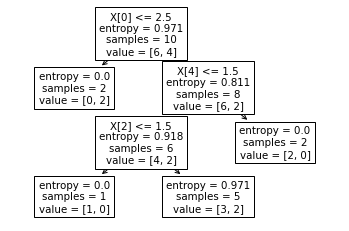

In [31]:
from sklearn.tree import DecisionTreeClassifier
tree.plot_tree(clf_en);

 # Thank